# Data exploration

In [1]:
# ignore warning for clear output
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
train_df = pd.read_csv('../data/train.csv')
train_df

,id,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,ingredients_ordered,target
0,765866d8167564278da2cf67aac203af,Vegano y vegetariano,0,1.9,NaN,16.8,0.8,16.7,4.3,272.0,1.41,"['gR05M7hdHDnkxI1EY0jB', 'SsJ4xBTSIBSpMwWeQFSC...",1
1,819227b8191615cea03aaf6763099b85,Panes,0,0.9,51.0,4.7,7.4,8.9,3.2,291.0,1.40,"['nJsnpHiBOUfvj5itad3B', 'cSoODVpMKhGnpTL6xxSn...",1
2,3ab004c9bf842cc6f87368e1daada35c,Verduras y hortalizas,0,0.0,1.0,0.0,0.0,0.7,1.2,9.0,0.80,"['0QGKoQHlkIBm6SlHSILI', 'cSoODVpMKhGnpTL6xxSn...",0
3,c31ebe68689adeac9900e94cc96199bc,Panes,0,0.6,49.0,3.6,3.2,9.2,5.5,276.0,0.98,"['nJsnpHiBOUfvj5itad3B', 'cSoODVpMKhGnpTL6xxSn...",1
4,334ee09448335590a3898d28476f1195,"Arroz, pasta y otros cereales",0,0.0,79.0,1.0,0.0,5.1,0.0,352.0,0.00,['Erwdjd3OtzRMjlHmEHdG'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,484083a26b3caf7f46973f39216e29bf,Yogures,0,5.0,14.4,7.7,14.1,2.9,0.0,39.0,0.10,"['sG2ApLdn0OnEW3OaCMys', 'c66gvYfTTXDE8EHOKVVG...",1
11996,58c1751cf8f58b8bc7f8e5848f1fed09,Conservas,0,3.5,0.2,16.0,0.0,1.3,3.1,156.0,2.60,"['cSoODVpMKhGnpTL6xxSn', 'ViRR41yHpkGvT0tdwY2V...",0
11997,e14f8b98e98f9c93a3d3592bb151523a,Carne,0,2.3,1.5,6.5,1.3,17.5,0.0,135.0,2.20,"['UODOEihlSRK2ZXbuS1Fy', 'QxZ6L3czM1HUAggHzU3Q...",1
11998,3f1631b0e1807a8e916727d0f9367c09,Quesos,0,6.8,3.5,10.0,3.5,11.0,0.0,153.0,2.50,"['7dTKaDhQYCelTZY0ly0n', 'EInFvJ1B8OAw3MPdoPdy...",1


In [3]:
train_df['target'].value_counts()
# The dataset is unbalanced
# There are 2 classes, Therefore I can use firstly logistic regression but I am going to train various models for I can evaluate them

1    7218
0    4782
Name: target, dtype: int64

In [4]:
train_df.info()
# we have to convert object type to int or float for train model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12000 non-null  object 
 1   category                        12000 non-null  object 
 2   is_liquid                       12000 non-null  int64  
 3   nutritional_saturated_fat_100g  11662 non-null  float64
 4   nutritional_carbohydrates_100g  11443 non-null  float64
 5   nutritional_fat_100g            11866 non-null  float64
 6   nutritional_sugars_100g         11680 non-null  float64
 7   nutritional_proteins_100g       11717 non-null  float64
 8   nutritional_fiber_100g          11590 non-null  float64
 9   nutritional_energy_100g         11659 non-null  float64
 10  nutritional_salt_100g           11492 non-null  float64
 11  ingredients_ordered             12000 non-null  object 
 12  target                          

In [5]:
train_df['id'].value_counts()
# checked if there are duplicated person bbut there are not

765866d8167564278da2cf67aac203af    1
18a1e673c8236bf193f5fd367352b24a    1
cf6ac97836b67337ca0ed41de1021b1d    1
bad45d891077b066369e8444d8a3273a    1
2bcb31762fdd0f8479ebbae3ac83e17d    1
                                   ..
8ba96ecae0ec5564667d0c585dc82e6c    1
62c656454cd575653cb8ecc7b8e9b259    1
048f657cac193bac0ebeb6a070e5a374    1
17f27e0a23735e21fae57a83b1081130    1
d27dc645037fa7e7cec6e13085704db5    1
Name: id, Length: 12000, dtype: int64

In [6]:
train_df.isnull().any()
# checked null values in dataset.
# Null values are mostly on float columns. Therefore I can calculate each column average and fill null values with average values

id                                False
category                          False
is_liquid                         False
nutritional_saturated_fat_100g     True
nutritional_carbohydrates_100g     True
nutritional_fat_100g               True
nutritional_sugars_100g            True
nutritional_proteins_100g          True
nutritional_fiber_100g             True
nutritional_energy_100g            True
nutritional_salt_100g              True
ingredients_ordered               False
target                            False
dtype: bool

In [7]:
# calcuate how many null values that we have in dataset
train_df.isnull().sum()
# there are lot of null values. Let's check how many item have each column

id                                  0
category                            0
is_liquid                           0
nutritional_saturated_fat_100g    338
nutritional_carbohydrates_100g    557
nutritional_fat_100g              134
nutritional_sugars_100g           320
nutritional_proteins_100g         283
nutritional_fiber_100g            410
nutritional_energy_100g           341
nutritional_salt_100g             508
ingredients_ordered                 0
target                              0
dtype: int64

# Feature engineering

In [18]:
import ast
import numpy as np

class PrepareDataset:
    def __init__(self, dataset, labelencoder):
        self.dataset = dataset
        self.le = labelencoder
    
    # convert string to list of string
    def string2list(self, datum):
        return ast.literal_eval(datum)
    
    def classify_ingredients(self, datum):
        return len(datum)

    def extract_feature(self):
        healty = []
        unhealty = []
        # detect healty and unhealty ingredients
        for i, target in enumerate(self.dataset["target"]):
            if target == 1:
                for item in self.dataset["ingredients_ordered"][i]:
                    if item not in healty:
                        healty.append(item)

            else:
                for item in self.dataset["ingredients_ordered"][i]:
                    if item not in unhealty:
                        unhealty.append(item)
        # detect intersections
        intersection = [item for item in healty if item in unhealty]
        # detect only healty items
        healty = [item for item in healty if item not in intersection]
        # detect only unhealty items
        unhealty = [item for item in unhealty if item not in intersection]

        # extract new features
        feature_len = 3
        is_ingredients_healty = np.zeros(shape=(self.dataset.shape[0],), dtype=int)
        is_ingredients_unhealty = np.zeros(shape=(self.dataset.shape[0],), dtype=int)
        is_ingredients_intersection = np.zeros(shape=(self.dataset.shape[0],), dtype=int)
        
        for i in range(self.dataset.shape[0]):
            for item in self.dataset["ingredients_ordered"][i]:
                if item in healty:
                    is_ingredients_healty[i] = 1
                if item in unhealty:
                    is_ingredients_unhealty[i] = 1
                if item in intersection:
                    is_ingredients_intersection[i] = 1
        self.dataset["is_ingredients_healty"] = is_ingredients_healty
        self.dataset["is_ingredients_unhealty"] = is_ingredients_unhealty
        self.dataset["is_ingredients_intersection"] = is_ingredients_intersection
    
    def prepare(self):
        # convert string data to list
        convert2list = lambda ingredients_string_data: self.string2list(ingredients_string_data)
        self.dataset['ingredients_ordered'] = self.dataset['ingredients_ordered'].apply(convert2list)


        # encode list of string values
        #self.encode_list_of_string()
        
        self.extract_feature()

        # fill null values with average of column
        keys = self.dataset.isnull().sum().keys()
        vals = self.dataset.isnull().sum().values
        for i, value in enumerate(vals):
            if value > 0:
                self.dataset[keys[i]].fillna((self.dataset[keys[i]].mean()), inplace=True)
        
        # encode category
        self.dataset['category'] = self.le.fit_transform(self.dataset['category'])
        
        # get number of ingredients as a feature
        #get_item_numbers = lambda ingredients_list_data: self.classify_ingredients(ingredients_list_data)
        #self.dataset['ingredients_ordered'] = self.dataset['ingredients_ordered'].apply(get_item_numbers)

        # drop columns which i wont use in train
        self.dataset = self.dataset.drop(['id', 'ingredients_ordered'], axis=1)

        return self.dataset

In [9]:
#def encode_list_of_string(self):
#    # get unique items
#    unique_ingredients = []
#    for ingredients in self.dataset['ingredients_ordered']:
#        for item in ingredients:
#            if item not in unique_ingredients:
#                unique_ingredients.append(item)
#        
#    self.le.fit(unique_ingredients)
#    encoded_ingredients = self.dataset['ingredients_ordered'].apply(lambda x:le.transform(x))
#    self.dataset['encoded_ingredients_ordered'] = encoded_ingredients

<AxesSubplot:>

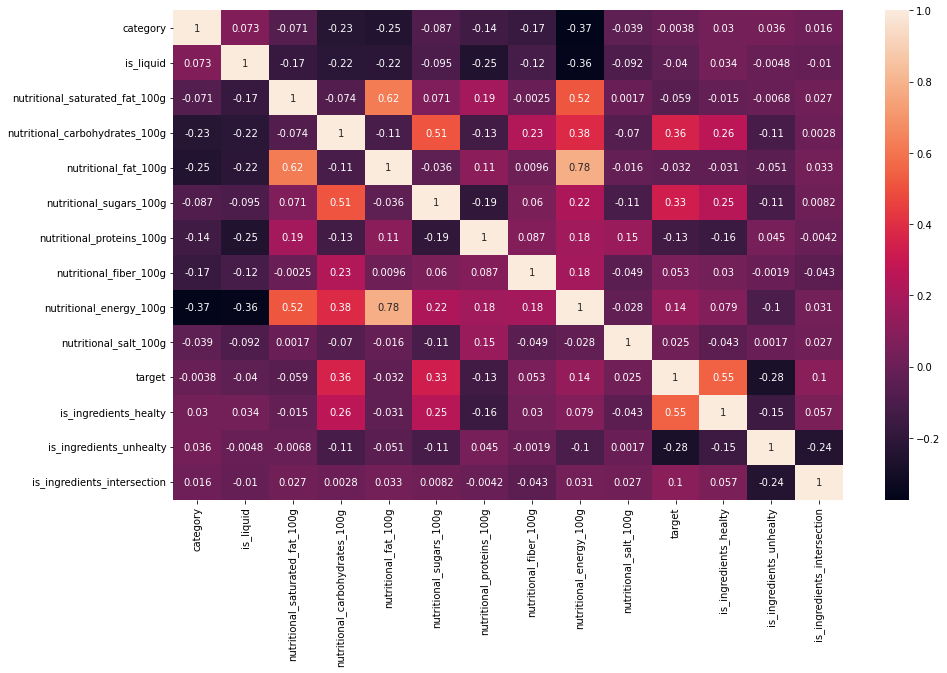

In [10]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# convert object data to float
le = LabelEncoder()

# prepare dataset
train_preparer = PrepareDataset(train_df, le)
train_df = train_preparer.prepare()

# visualize correlation
fig = plt.figure(figsize = (15, 9))
sns.heatmap(train_df.corr(), annot=True)

Correlation shows that target related with nutritional_sugars_100gr, nutritional_carbohydrates_100gr and is_ingredients_healty. But the correlation score is not so high to tell they are totally related. is_ingredients_healty and target shows that correlation because of there are more content which target is healthy

# Train

In [11]:
train_df

,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,target,is_ingredients_healty,is_ingredients_unhealty,is_ingredients_intersection
0,37,0,1.9,25.106827,16.8,0.8,16.7,4.3,272.0,1.41,1,0,0,1
1,29,0,0.9,51.000000,4.7,7.4,8.9,3.2,291.0,1.40,1,0,0,1
2,38,0,0.0,1.000000,0.0,0.0,0.7,1.2,9.0,0.80,0,0,1,1
3,29,0,0.6,49.000000,3.6,3.2,9.2,5.5,276.0,0.98,1,1,0,1
4,3,0,0.0,79.000000,1.0,0.0,5.1,0.0,352.0,0.00,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,41,0,5.0,14.400000,7.7,14.1,2.9,0.0,39.0,0.10,1,1,0,1
11996,12,0,3.5,0.200000,16.0,0.0,1.3,3.1,156.0,2.60,0,0,0,1
11997,8,0,2.3,1.500000,6.5,1.3,17.5,0.0,135.0,2.20,1,0,0,1
11998,33,0,6.8,3.500000,10.0,3.5,11.0,0.0,153.0,2.50,1,0,0,1


In [12]:
# get features and labels
train_labels = train_df['target']
train_df = train_df.drop(['target'], axis=1)
train_features = train_df[train_df.columns.values]

In [13]:
# Before I checked targets and I released that the data is unbalanced. So I need to define weights for logistic regression model
# I will get percentage of classes and give weightes like that
tot = 7218+4782
for_1 = 7218/tot
for_0 = 4782/tot

print("for_1 ==> ", for_1)
print("for_0 ==> ", for_0)
# give weightes for unbalanced. Fine tune logistic regression
lg_weights = {0:for_1, 1:for_0}

for_1 ==>  0.6015
for_0 ==>  0.3985


In [14]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

class Trainer:
    def __init__(self, features, labels, lg_ft) -> None:
        self.features = features
        self.labels = labels
        self.lg_ft = lg_ft
        self.svm = SVC(kernel='linear', gamma='auto', probability=True)
        self.log_reg = LogisticRegression(random_state=0, class_weight=self.lg_ft)
        self.gaussian = GaussianNB()
        self.knn = KNeighborsClassifier(n_neighbors=2)
        self.randon_forest = RandomForestClassifier()
    
    def train_models(self):
        log_reg_model = self.log_reg.fit(self.features, self.labels)
        print("LogisticRegression model trained")
        gaussian_model = self.gaussian.fit(self.features, self.labels)
        print("GaussianNB model trained")
        knn_model = self.knn.fit(self.features, self.labels)
        print("KNeighborsClassifier model trained")
        random_forest_model = self.randon_forest.fit(self.features, self.labels)
        print("RandomForestClassifier model trained")
        svm_model = self.svm.fit(self.features, self.labels)
        print("SVM model trained")

        return svm_model, log_reg_model, gaussian_model, knn_model, random_forest_model

In [15]:
trainer = Trainer(features=train_features, labels=train_labels, lg_ft=lg_weights)
models = trainer.train_models()

LogisticRegression model trained
GaussianNB model trained
KNeighborsClassifier model trained
RandomForestClassifier model trained
SVM model trained


In [16]:
# Check training accuracy
for model in models:
    test_acc = model.score(train_features, train_labels)
    print(f"{str(round(test_acc * 100,2))}% train accuracy ===> {str(model)}")

80.16% train accuracy ===> SVC(gamma='auto', kernel='linear', probability=True)
79.73% train accuracy ===> LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0)
80.17% train accuracy ===> GaussianNB()
93.65% train accuracy ===> KNeighborsClassifier(n_neighbors=2)
99.82% train accuracy ===> RandomForestClassifier()


# Evaluate

In [19]:
# preprocess for test data
test_df = pd.read_csv('../data/test.csv')
test_preparer = PrepareDataset(test_df, le)
test_df = test_preparer.prepare()
test_df.head()

,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,target,is_ingredients_healty,is_ingredients_unhealty,is_ingredients_intersection
0,39,0,2.0,4.000000,3.0,4.0,3.3,0.0,246.0,1.268215,0,0,0,1
1,33,0,19.4,0.980000,27.0,0.1,19.4,0.0,325.0,1.268215,0,0,1,1
2,14,0,0.0,15.000000,0.1,12.5,0.3,0.7,62.0,0.010000,1,0,0,1
3,10,0,3.0,25.587791,8.0,1.0,40.0,0.0,236.0,4.500000,0,0,0,1
4,35,0,0.4,6.000000,3.1,6.0,1.1,1.3,59.0,1.000000,1,0,0,1


In [20]:
# get test features and labels
test_labels = test_df['target']
test_df = test_df.drop(['target'], axis=1)
test_features = test_df[test_df.columns.values]

In [21]:
# Evaluate model with acc based on test set
for model in models:
    test_acc = model.score(test_features, test_labels)
    print(f"{str(round(test_acc * 100,2))}% test accuracy ===> {str(model)}")

85.07% test accuracy ===> SVC(gamma='auto', kernel='linear', probability=True)
85.5% test accuracy ===> LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0)
84.9% test accuracy ===> GaussianNB()
84.73% test accuracy ===> KNeighborsClassifier(n_neighbors=2)
94.7% test accuracy ===> RandomForestClassifier()


For now random forest is looking good but lets check if there is overfitting with cross validation

In [22]:
# Evaluate models on test dataset with cross validation
from sklearn.model_selection import cross_val_score

for model in models:
    print(f"{str(model)} is evaluating..")
    print(cross_val_score(model, test_features, test_labels))

SVC(gamma='auto', kernel='linear', probability=True) is evaluating..
[0.82       0.87333333 0.85333333 0.835      0.845     ]
LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0) is evaluating..
[0.83333333 0.86       0.85666667 0.82166667 0.84333333]
GaussianNB() is evaluating..
[0.795      0.77666667 0.855      0.81       0.84166667]
KNeighborsClassifier(n_neighbors=2) is evaluating..
[0.79833333 0.80833333 0.80333333 0.78       0.80833333]
RandomForestClassifier() is evaluating..
[0.90333333 0.94666667 0.92666667 0.92333333 0.91166667]


Accuracies and cross validation accuracies are looking well. Cross validation shows that there is no overfitting issue. 
Normally, we do not need to check confusion matrix for check how balanced prediction that we are doing

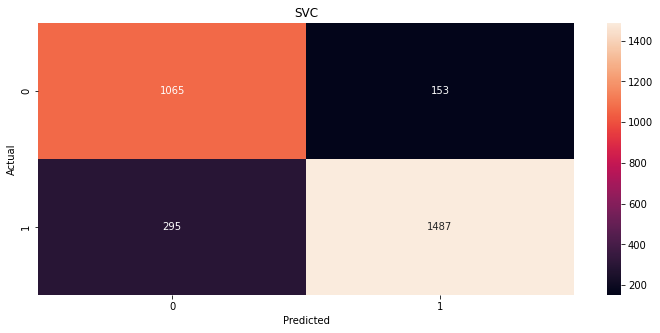

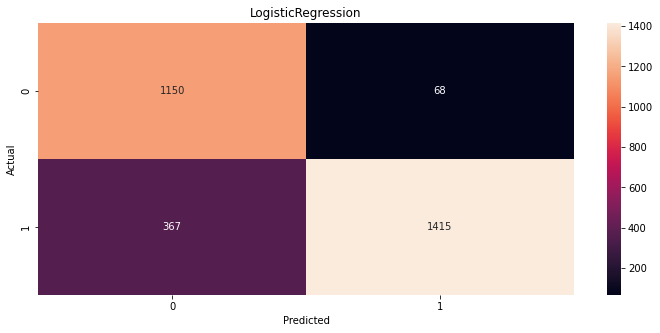

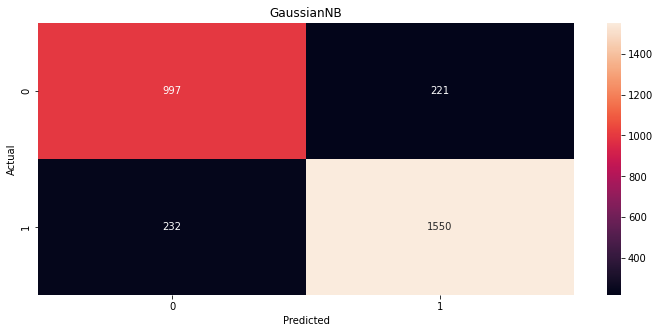

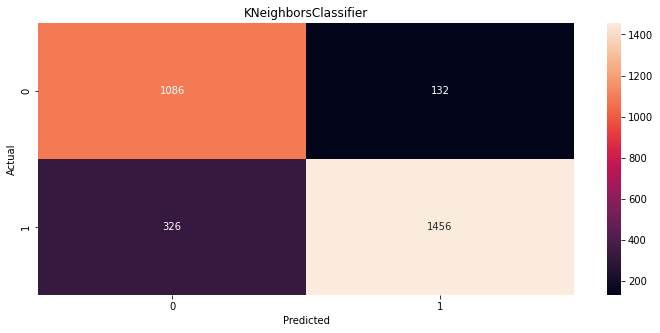

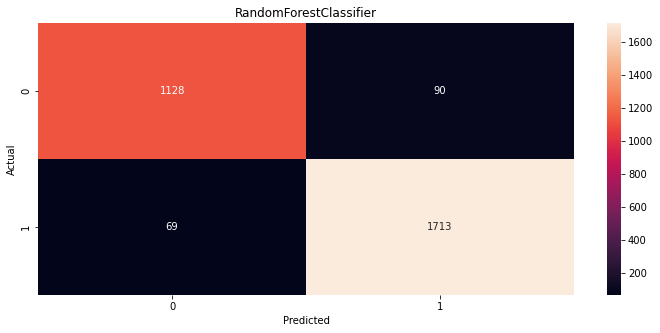

In [23]:
from sklearn.metrics import confusion_matrix

for model in models:
    model_name = str(model).split("(")[0]
    preds = model.predict(test_features)
    conf_mat = confusion_matrix(test_labels, preds)
    fig, ax = plt.subplots(figsize=(12,5))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.title(f"{model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    fig.savefig(f"../data/default-{model_name}.jpg")

At the beginning already I saw the data was not perfectly balanced and CF is showing that too. Thefore False positive higher than False negative. In other words, More acurately predicted 1 because class 1 has more samples. If we will product that model. We have to think well about each class cost. I assume that both class has same cost. Therefore, I will try to find best threshold for each model to predict more balanced. To do that we will need ROC curve

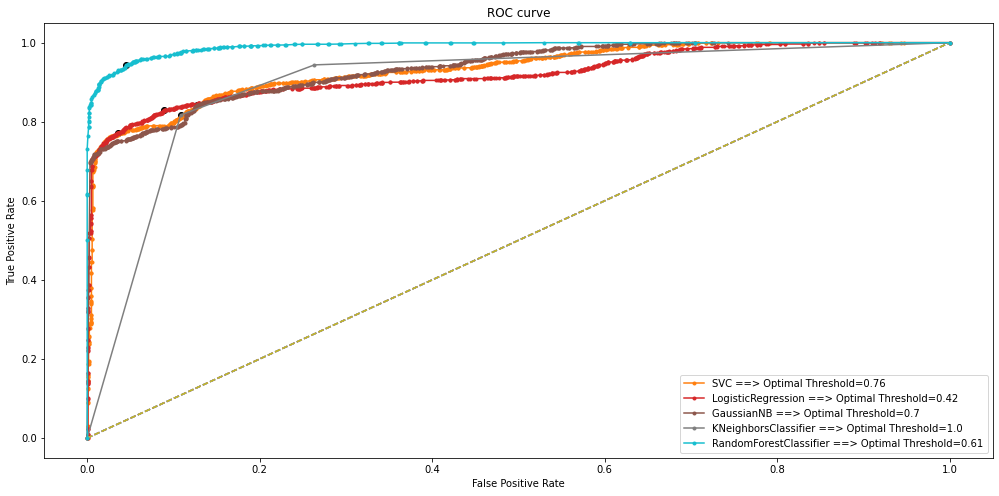

In [24]:
from sklearn.metrics import roc_curve
from numpy import sqrt, argmax
import numpy as np
import matplotlib.pyplot as plt

best_thresholds = np.empty((len(models)), dtype=object)
fig, ax = plt.subplots(figsize=(17, 8))
plt.title("ROC curve")
for i, model in enumerate(models):
    model_name = str(model).split("(")[0]
    temp = {
        "model_name": model_name,
        "optimal_thresh": float
    }
    prodiction_prob = model.predict_proba(test_features)
    # keep probabilities for the positive outcome only
    prodiction_prob = prodiction_prob[:, 1]
    fpr, tpr, thresholds = roc_curve(test_labels, prodiction_prob)
    # calculate the geometric mean for each threshold
    gmeans = sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = argmax(gmeans)
    temp["optimal_thresh"] = thresholds[ix]
    #print('Best Threshold for %s =%f, G-Mean=%.3f' % (str(model), thresholds[ix], gmeans[ix]))
    plt.plot([0,1], [0,1], linestyle='--')
    plt.plot(fpr, tpr, marker='.', label=f"{model_name} ==> Optimal Threshold={round(thresholds[ix], 2)}")
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black')
    best_thresholds[i] = temp
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

Above we can see all models and optimal thresholds. Now, we need to visualise confution matrix with optimal thresholds

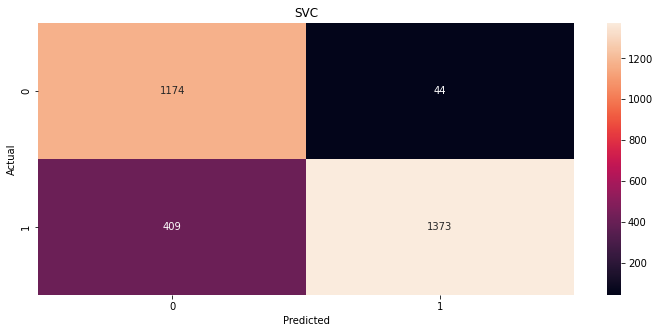

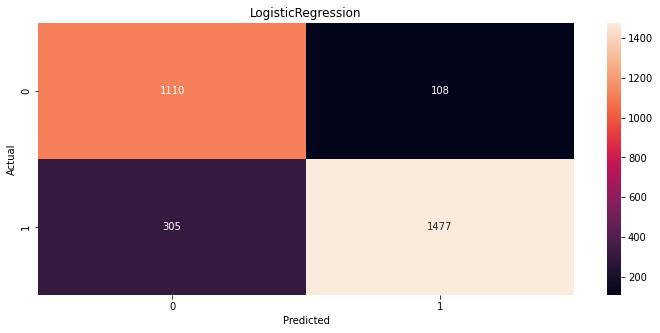

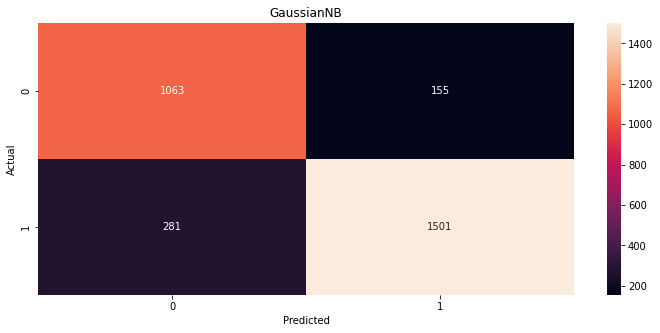

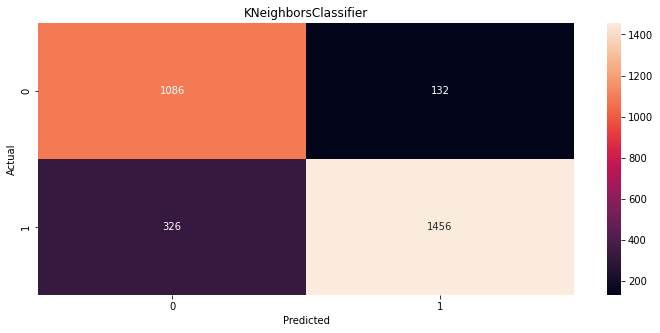

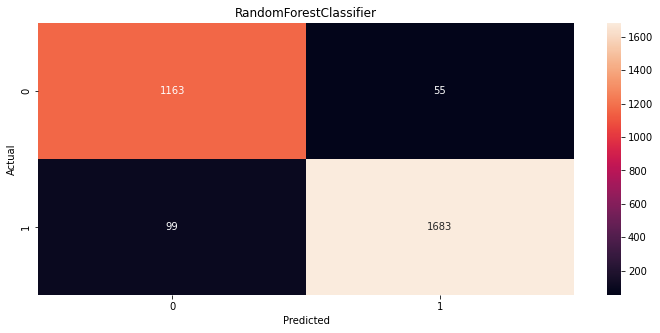

In [25]:
from sklearn.metrics import classification_report

for i, model in enumerate(models):
    threshold = best_thresholds[i]['optimal_thresh']
    model_name = str(model).split("(")[0]
    predictions = model.predict_proba(test_features)
    predictions = (predictions[:,1] >= threshold).astype('int')
    conf_mat = confusion_matrix(test_labels, predictions)
    fig, ax = plt.subplots(figsize=(12,5))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.title(f"{model_name}")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()
    fig.savefig(f"../data/thres-{model_name}.jpg")

Now we have little bit less wrong predictions. For that dataset is not effect too much. If the dataset was much larger. We could see how ROC curve could change the prediction

Maybe confution matrixes are little bit complex to see accuracy. For see precision recall and f1-score we can use classification report. Also we can compare between detaulf(0.5) threshold and optimized threshold while visualising both classification reports

In [26]:
# default threhold classification reports
from sklearn.metrics import classification_report

for model in models:
    threshold = best_thresholds[i]['optimal_thresh']
    model_name = str(model).split("(")[0]
    predictions = model.predict(test_features)
    print(model_name)
    print(classification_report(test_labels, predictions))
    print("\n")

SVC
              precision    recall  f1-score   support

           0       0.78      0.87      0.83      1218
           1       0.91      0.83      0.87      1782

    accuracy                           0.85      3000
   macro avg       0.84      0.85      0.85      3000
weighted avg       0.86      0.85      0.85      3000



LogisticRegression
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      1218
           1       0.95      0.79      0.87      1782

    accuracy                           0.85      3000
   macro avg       0.86      0.87      0.85      3000
weighted avg       0.87      0.85      0.86      3000



GaussianNB
              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1218
           1       0.88      0.87      0.87      1782

    accuracy                           0.85      3000
   macro avg       0.84      0.84      0.84      3000
weighted avg       0.85      0.85   

In [27]:
# fixed threhold classification reports
from sklearn.metrics import classification_report

for model in models:
    threshold = best_thresholds[i]['optimal_thresh']
    model_name = str(model).split("(")[0]
    predictions = model.predict_proba(test_features)
    predictions = (predictions[:,1] >= threshold).astype('int')
    print(model_name)
    print(classification_report(test_labels, predictions))
    print("\n")

SVC
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1218
           1       0.92      0.81      0.86      1782

    accuracy                           0.84      3000
   macro avg       0.84      0.85      0.84      3000
weighted avg       0.85      0.84      0.85      3000



LogisticRegression
              precision    recall  f1-score   support

           0       0.74      0.97      0.84      1218
           1       0.97      0.77      0.86      1782

    accuracy                           0.85      3000
   macro avg       0.86      0.87      0.85      3000
weighted avg       0.88      0.85      0.85      3000



GaussianNB
              precision    recall  f1-score   support

           0       0.80      0.85      0.83      1218
           1       0.90      0.85      0.87      1782

    accuracy                           0.85      3000
   macro avg       0.85      0.85      0.85      3000
weighted avg       0.86      0.85   

SMALL MODEL SIZE AND HIGH ACC IS THE BEST. We know this and as I said above I assume that each class price is the same. Therefore, I would chose RandomForest nevertheless we have to check speed because in API it can be costly. Now save all models then we have to send some requirest to our API and check the runtime

In [107]:
import pickle
for trained_model in models:
    file_path = f"../models/{str(trained_model)}.pkl"
    with open(file_path, 'wb') as file:
        pickle.dump(trained_model, file)